### 라이브러리 선언 및 데이터 불러오기

In [6]:
import pandas as pd

In [7]:
# K Means 라이브러리
from sklearn.cluster import KMeans

ImportError: cannot import name '_rename_parameter' from 'scipy._lib._util' (C:\Users\AnJungHoon\anaconda3\lib\site-packages\scipy\_lib\_util.py)

In [4]:
# 시각화 라이브러리
import matplotlib.pyplot as plt
#CSV 파일을 읽어 DataFrame 변수에 저장하기
studentData = pd.read_csv("../dataset/student_middle.csv")
studentData.head()

ImportError: cannot import name '_rename_parameter' from 'scipy._lib._util' (C:\Users\AnJungHoon\anaconda3\lib\site-packages\scipy\_lib\_util.py)

### 데이터 분리

In [2]:
featuresColumns = ["SW","DB","AND"]

In [3]:
features = studentData.loc[:,featuresColumns]

In [4]:
features.shape

(26, 3)

### 모델선언 및 feature 만 활용하여 자율학습 예측

In [5]:
model_method = \
    KMeans(random_state=3, n_clusters=2)

In [6]:
model_kmeans = model_method.fit(features)

In [7]:
predictValue = model_kmeans.predict(features)

In [8]:
predictValue

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [9]:
studentData["PREDICT_CLUSTER"] = predictValue

In [10]:
studentData

,NAME,SW,DB,AND,PREDICT_CLUSTER
0,ST0001,95,30,0,0
1,ST0002,50,50,0,0
2,ST0003,15,30,15,0
3,ST0004,90,50,20,0
4,ST0005,75,20,20,0
5,ST0006,100,80,30,1
6,ST0007,15,10,30,0
7,ST0008,100,100,33,1
8,ST0009,65,60,35,0
9,ST0010,90,20,38,0


In [11]:
features.columns

Index(['SW', 'DB', 'AND'], dtype='object')

In [12]:
testData = pd.DataFrame( [[100,100,100]] )

In [13]:
model_kmeans.predict(testData)

array([1])

In [14]:
sse = []

In [15]:
K = range(1,8)

In [16]:
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    sse.append(km.inertia_)

C:\Users\SMART-14\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


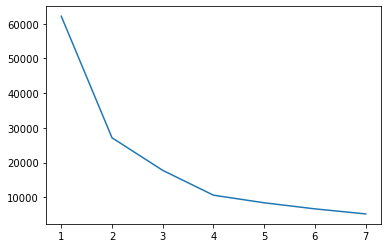

In [17]:
plt.plot( range(1,8), sse )

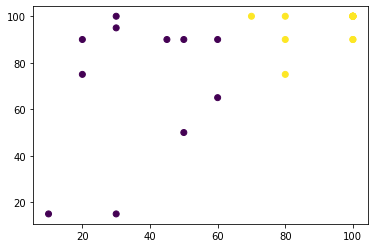

In [18]:
plt.scatter(x=studentData["DB"],
            y=studentData["SW"],
            c=studentData["PREDICT_CLUSTER"])